This notebook will demonstrate exploratory and aggregate data analysis from Pandas dataframe and BigQuery tables. Lines starting with '%' and '%%' use notebook line / cell magic to wrap underlying python function, thereby providing easier access to things like BQ and visulization functions. Please use the python functions for customization.

Note that running this notebook may require installing or updating a few libraries.
 * [plotnine](https://plotnine.readthedocs.io/en/stable/): ggplot-like plotting in Python, which powers plotting on aggregated data
 * [google-cloud-bigquery](https://pypi.org/project/google-cloud-bigquery/): some features of BigQuery Magic (i.e. table creation) requires latest version of this package

In [27]:
import pandas as pd
import matplotlib.style as style
from plotnine import *
from plotnine.data import mpg

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import e3tools.eda_notebook_magic as enm
%alias_magic --line eda_plot eda_distplot
import e3tools.eda_table as et
import e3tools.eda_display_utils as edu
import e3tools.eda_bq_utils as ebu

Created `%eda_plot` as an alias for `%eda_distplot`.


In [5]:
# for dev purpose
from importlib import reload
reload(enm)
reload(enm.et)
reload(enm.ebu)
reload(enm.edu)

<module 'e3tools.eda_display_utils' from '/Users/jinkim/dev/e3tools/e3tools/eda_display_utils.py'>

In [30]:
BQ_PROJECT_NAME = "lifidea7"

## EDA on DataFrame

In [6]:
%eda?

In [7]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [8]:
%eda mpg

Total: 234 rows


,DataType,ValueCount,NullCount,ZeroCount,0,1,2
manufacturer,category,15,0,0,audi,audi,audi
model,category,38,0,0,a4,a4,a4
displ,float64,35,0,0,1.8,1.8,2
year,int64,2,0,0,1999,1999,2008
cyl,int64,4,0,0,4,4,4
trans,category,10,0,0,auto(l5),manual(m5),manual(m6)
drv,category,3,0,0,f,f,f
cty,int64,21,0,0,18,21,20
hwy,int64,27,0,0,29,29,31
fl,category,5,0,0,p,p,p


EDA instance initialized... (in 'mpg_e' variable)


### Column Value Distribution

In [9]:
%eda_distplot?

In [10]:
%eda_distplot

/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator


"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAWgAAAFoCAYAAAB65WHVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAAKCklEQVR4nO3dTWjcdR7H8e%2BEsQibQm2Igg9gixo9SClbKd5URA8mFITFw4K1IB487GndVGmpuXRhWQ8LEhbdyuJhiRS1Hkorig8IFa9dEIoiPlShtrGapKVJY2Yvu4Ws4lP%2BcT6Zeb1OScj/m%2B/v8s7wz0ym1el0OgVAnIFuLwDA9xNogFACDRBKoAFCCTRAKIEGCCXQAKEEGiCUQAOEEmiAUAINEEqgAUIJNEAogQYIJdAAoQSanvbmm2/WyMhIt9eAX0SgAUIJNEAogaanfPLJJ/XQQw/Vli1baseOHfXhhx9WVdXJkydrZGSkJicna/v27fXwww/XnXfeWc8///yy6x999NHau3dvN1aH72h3ewFoysWLF%2BuRRx6pzZs314svvlgfffRR7dmzZ9n3vPXWWzU1NVWLi4t16NChOnLkSD344INVVTU7O1vvvPNOHThwoBvrw3cIND3j2LFj9cUXX9QLL7xQGzZsqBtuuKE%2B/vjjeuqppy59z86dO2vTpk1VVTU2NlYHDhyoU6dO1VVXXVWvv/56bdy4sW677bZuHQGWcYuDnvHBBx/U1VdfXRs2bLj0tVtvvXXZ91x33XWXPr755pvrxhtvrCNHjlRV1eHDh%2Bu%2B%2B%2B6rVqv1q%2BwLP0ag6WmXXXbZss8vv/zyZZ%2BPjo7W0aNH6%2Buvv6533323xsbGfs314AcJND1jZGSkPv/88zpz5sylr73//vs/eM3o6GgdP368Dh48WNdff33dcsstq70m/GQCTc%2B4/fbba/PmzTU%2BPl4nTpyot99%2Bu5555pkfvOaaa66pLVu21OTkZI2Ojv5Km8JPI9D0jHa7Xc8%2B%2B2y12%2B164IEHav/%2B/bVr164fvW5sbKzOnz8v0MRpdTqdTreXAOC7PIIGCCXQAKEEGiCUQAOEEmiAUAINECrinyWdPXuulpZ689l%2BQ0ODNT091%2B01VlWvn9H51rZunW9goFVXXPGbFc2ICPTSUqdnA11VPX22/%2Bn1Mzrf2rZWz%2BcWB0AogQYIJdAAoQQaIJRAA4QSaIBQAg0Qyv%2BDBvrahfmLNTtzofG5AwOtGhoaXNGMiBeq/OHPh%2BrM2XPdXgPoQ//6y%2B9rtpoPdBPc4gAIJdAAoQQaIJRAA4QSaIBQAg0QSqABQgk0QCiBBggl0AChBBoglEADhBJogFACDRBKoAFCCTRAKIEGCCXQAKEEGiCUQAOEEmiAUAINEEqgAUIJNEAogQYIJdAAoQQaIJRAA4QSaIBQAg0QSqABQgk0QCiBBggl0AChBBogVKOBnpmZqTvuuKNeeumlJscC9KVGA71v3746depUkyMB%2BlZjgX755Zdrbm6ubrrppqZGAvS1RgL92Wef1dNPP1379%2B9vYhwA1UCgv/3223rsscdqfHy8hoeHm9gJgGog0JOTk7Vp06a65557mtgHgP9qr3TA4cOH68svv6zXXnutqqrOnTtXExMTdfz48XryySdXOh6gb6040EePHl32%2BY4dO2rnzp11//33r3Q0QF/zQhWAUCt%2BBP3/XnnllaZHAvQlj6ABQgk0QCiBBggl0AChBBoglEADhBJogFACDRBKoAFCCTRAKIEGCCXQAKEEGiCUQAOEEmiAUAINEEqgAUIJNEAogQYIJdAAoQQaIJRAA4QSaIBQAg0QSqABQgk0QCiBBggl0AChBBoglEADhBJogFACDRBKoAFCCTRAKIEGCCXQAKFanU6n0%2B0lALrlwvzFmp250PjcgYFWDQ0NrmhGu6FdVmR6eq6Wlnrz98Tw8Po6fXq222usql4/o/OtbWv5fG5xAIQSaIBQAg0QSqABQgk0QCiBBggl0AChBBoglEADhBJogFACDRBKoAFCCTRAKIEGCCXQAKEEGiCUQAOEEmiAUAINEMqbxgL8iMWF%2BTr7zcLPuqZn3jT2338fr4WZ6W6vAfC9fvunf1TVzwt0E9ziAAgl0AChBBoglEADhBJogFACDRBKoAFCCTRAKIEGCCXQAKEEGiCUQAOEEmiAUAINEEqgAUIJNEAogQYIJdAAoQQaIJRAA4QSaIBQAg0QSqABQgk0QCiBBggl0AChBBoglEADhBJogFACDRBKoAFCCTRAKIEGCCXQAKEEGiBU44F%2B7rnnatu2bbV9%2B/aam5trejxA32g80FNTU/X444/Xe%2B%2B9V4ODg02PB%2BgbjQb63nvvrU8//bQmJiZq9%2B7dTY4G6DvtJoe9%2Buqrddddd9UTTzxRd999d5OjAfqOPxIChBJogFACDRBKoAFCCTRAqEafxVFV9cYbbzQ9EqAveQQNEEqgAUIJNEAogQYIJdAAoQQaIJRAA4QSaIBQAg0QSqABQgk0QCiBBggl0AChBBoglEADhBJogFACDRBKoAFCCTRAKIEGCCXQAKEEGiCUQAOEEmiAUAINEEqgAUIJNEAogQYIJdAAoQQaIJRAA4QSaIBQAg0QSqABQgk0QCiBBgjV6nQ6nW4vAZBscWG%2Bzn6z8LOuGRho1dDQ4Ip%2BbntFVzdkenqulpZ68/fE8PD6On16tttrrKpeP6PzrW1r%2BXxucQCEEmiAUAINEEqgAUIJNEAogQYIJdAAoQQaIJRAA4QSaIBQAg0QSqABQgk0QCiBBggl0AChBBoglEADhBJogFACDRAq4j0JV/rGiumGh9f/ouvmFxZq5pv5hrcB1oqIQP/x4ESdmfuq22vE%2Beeuv1WVQEO/cosDIJRAA4QSaIBQAg0QSqABQgk0QCiBBggl0AChBBoglEADhBJogFACDRBKoAFCCTRAKIEGCCXQAKEEGiCUQAOEEmiAUAINEEqgAUIJNEAogQYIJdAAoQQaIJRAA4QSaIBQAg0QSqABQgk0QCiBBggl0AChBBoglEADhBJogFACDRBKoAFCNRrokydP1tatW2vPnj21bdu2mpqaanI8QF9pNz3w/PnztXHjxjp27FgtLi42PR6gbzQe6KqqsbGxWrduXa1bt241xgP0hVW5B33llVeuxliAvrIqgW61WqsxFqCveBYHQCiBBgjV6B8Jr7322jpx4kSTIwH6lkfQAKEEGiCUQAOEEmiAUAINEEqgAUIJNEAogQYIJdAAoQQaIJRAA4QSaIBQAg0QSqABQgk0QCiBBggl0AChBBoglEADhBJogFACDRBKoAFCCTRAKIEGCCXQAKEEGiCUQAOEEmiAUAINEEqgAUIJNEAogQYIJdAAoQQaIJRAA4QSaIBQ7W4vUFX119/t6/YKkeYXFrq9AtBFEYGenp6rpaVOt9dYFcPD6%2Bv06dlurwGsQW5xAIQSaIBQAg0QSqABQgk0QCiBBggl0AChIp4HPTDQ6vYKq6rXz1fV%2B2d0vrWtG%2Bdr4me2Op1Ob75CBGCNc4sDIJRAA4QSaIBQAg0QSqABQgk0QCiBBggl0AChBBoglEADhBJogFACDRBKoAFCCTRAKIEGCPUf5EmZZJdNjiYAAAAASUVORK5CYII%3D"">"
"<img src=""%2Bk/BHyjXCqWQBqHYKMI2IqJII7gVbHCRjY1gW2KLbWthA2GzYGUDS0ZyIdkgCAvC/lAoKBChv8wRhjx1NctmGufsP5dY6W6rne/c88rv4/HfnOG85833j6dfPp4fA91ut1sAxJnX7wUA%2BNMEGiCUQAOEEmiAUAINEEqgAUIJNEAogQYIJdAAoQQaIJRAA4QSaIBQAg0QSqABQgk0QCiBphWOHDlSW7ZsqTV

<Figure size 360x360 with 0 Axes>

In [11]:
%eda_distplot -g drv -c cty,trans

/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator


drv: 4,drv: f,drv: r
drv: 4,drv: f,drv: r


<Figure size 360x360 with 0 Axes>

In [12]:
%eda_pairplot?

In [13]:
%eda_pairplot -c cty,hwy

<Figure size 360x360 with 0 Axes>

In [14]:
mpg_e.colinfo()

Total: 234 rows


,DataType,ValueCount,NullCount,ZeroCount,0,1,2
manufacturer,category,15,0,0,audi,audi,audi
model,category,38,0,0,a4,a4,a4
displ,float64,35,0,0,1.8,1.8,2
year,int64,2,0,0,1999,1999,2008
cyl,int64,4,0,0,4,4,4
trans,category,10,0,0,auto(l5),manual(m5),manual(m6)
drv,category,3,0,0,f,f,f
cty,int64,21,0,0,18,21,20
hwy,int64,27,0,0,29,29,31
fl,category,5,0,0,p,p,p


## EDA on Census Dataset from BQ Table

Let's try EDA on [Adult Census Data](http://archive.ics.uci.edu/ml/datasets/Adult) available in BigQuery public dataset

In [31]:
%%eda_bq census -n 1000 -p $BQ_PROJECT_NAME
SELECT * FROM `bigquery-public-data.ml_datasets.census_adult_income`

Sample Rate: 32561 / 1000 = 32
BQ DataFrame initialized... (in 'census' variable)
Total: 962 rows


,DataType,ValueCount,NullCount,ZeroCount,0,1,2
age,int64,63,0,0,43,24,52
workclass,object,8,0,0,Private,?,?
functional_weight,int64,942,0,0,167599,174182,89951
education,object,16,0,0,11th,11th,12th
education_num,int64,16,0,0,7,7,8
marital_status,object,7,0,0,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
occupation,object,14,0,0,Handlers-cleaners,?,?
relationship,object,6,0,0,Wife,Wife,Wife
race,object,5,0,0,White,Other,Black
sex,object,2,0,0,Female,Female,Female


EDA instance initialized... (in 'census_e' variable)


In [19]:
census.sample(10)

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
164,72,?,76860,HS-grad,9,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,1,United-States,<=50K
272,32,Private,194426,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,United-States,>50K
28,43,Private,195212,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,Black,Female,0,0,40,?,<=50K
513,35,Private,283237,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
66,45,Private,166929,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
984,28,Private,110164,Some-college,10,Divorced,Other-service,Other-relative,Black,Male,0,0,24,United-States,<=50K
927,64,Self-emp-not-inc,170421,Some-college,10,Widowed,Craft-repair,Not-in-family,White,Female,0,0,8,United-States,<=50K
383,35,Private,374524,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,75,United-States,>50K
498,31,Private,79190,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,35,United-States,<=50K
584,19,Private,208656,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,594,0,20,United-States,<=50K


In [20]:
%eda_plot

/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning: FixedFormatter should only be used together wi

<Figure size 360x360 with 0 Axes>

In [21]:
%eda_plot -g income_bracket -c capital_gain,capital_loss

income_bracket: <=50K,income_bracket: >50K
income_bracket: <=50K,income_bracket: >50K


<Figure size 360x360 with 0 Axes>

In [22]:
%eda_pairplot -c capital_gain,capital_loss

<Figure size 360x360 with 0 Axes>

## Aggregate Stats on BQ Table

In [23]:
%%agg_bq?

In [24]:
metric = 'capital_netgain'

In [25]:
reload(enm)

<module 'e3tools.eda_notebook_magic' from '/Users/jinkim/dev/e3tools/e3tools/eda_notebook_magic.py'>

In [28]:
# You can also pass python variable to SQL
race_filter = ebu.list_to_str([' White', ' Black'])
race_filter

"' White',' Black'"

In [32]:
%%agg_bq atbl income_bracket,sex,race,marital_status $metric -v -p $BQ_PROJECT_NAME
SELECT 
*,
capital_gain - capital_loss capital_netgain 
FROM `bigquery-public-data.ml_datasets.census_adult_income`
WHERE race in ({race_filter})


SELECT income_bracket AS income_bracket,
       sex AS sex,
       race AS race,
       marital_status AS marital_status,
       count(*) AS sample_size,
       SUM(capital_netgain) AS capital_netgain_sum,
       SUM(POW(capital_netgain, 2)) AS capital_netgain_ssq,
       AVG(capital_netgain) AS capital_netgain_avg,
       SUM(IF(capital_netgain>0, 1, 0)) AS capital_netgain_bsum,
       AVG(IF(capital_netgain>0, 1, 0)) AS capital_netgain_bavg,
       SUM(IF(capital_netgain IS NULL, 1, 0)) AS capital_netgain_pnull,
       SUM(IF(capital_netgain IS NOT NULL, 1, 0)) AS capital_netgain_sample_size
FROM
  (SELECT *,
          capital_gain - capital_loss capital_netgain
   FROM `bigquery-public-data.ml_datasets.census_adult_income`
   WHERE race in (' White',
                  ' Black') )
GROUP BY income_bracket,
         sex,
         race,
         marital_status
HAVING sample_size >= 0
ORDER BY income_bracket,
         sex,
         race,
         marital_status


,0,1,2,3,4
income_bracket,<=50K,<=50K,<=50K,<=50K,<=50K
sex,Female,Female,Female,Female,Female
race,Black,Black,Black,Black,Black
marital_status,Divorced,Married-civ-spouse,Married-spouse-absent,Never-married,Separated
sample_size,320,108,40,712,176
capital_netgain_sum,26582,21342,0,35900,10724
capital_netgain_ssq,1.90034e+08,9.15466e+07,0,2.83349e+08,9.01421e+07
capital_netgain_avg,83.0687,197.611,0,50.4213,60.9318
capital_netgain_bsum,9,7,0,24,4
capital_netgain_bavg,0.028125,0.0648148,0,0.0337079,0.0227273


In [33]:
atbl.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
income_bracket,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K
sex,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female
race,Black,Black,Black,Black,Black,Black,White,White,White,White
marital_status,Divorced,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent
sample_size,320,108,40,712,176,109,2075,8,713,122
capital_netgain_sum,26582,21342,0,35900,10724,1841,119220,2653,162886,2237
capital_netgain_ssq,1.90034e+08,9.15466e+07,0,2.83349e+08,9.01421e+07,1.02432e+08,1.10916e+09,7.03841e+06,1.37302e+09,2.70384e+07
capital_netgain_avg,83.0687,197.611,0,50.4213,60.9318,16.8899,57.4554,331.625,228.452,18.3361
capital_netgain_bsum,9,7,0,24,4,5,76,1,50,4
capital_netgain_bavg,0.028125,0.0648148,0,0.0337079,0.0227273,0.0458716,0.0366265,0.125,0.0701262,0.0327869


### Plotting Aggregate Data

In [34]:
%agg_plot?

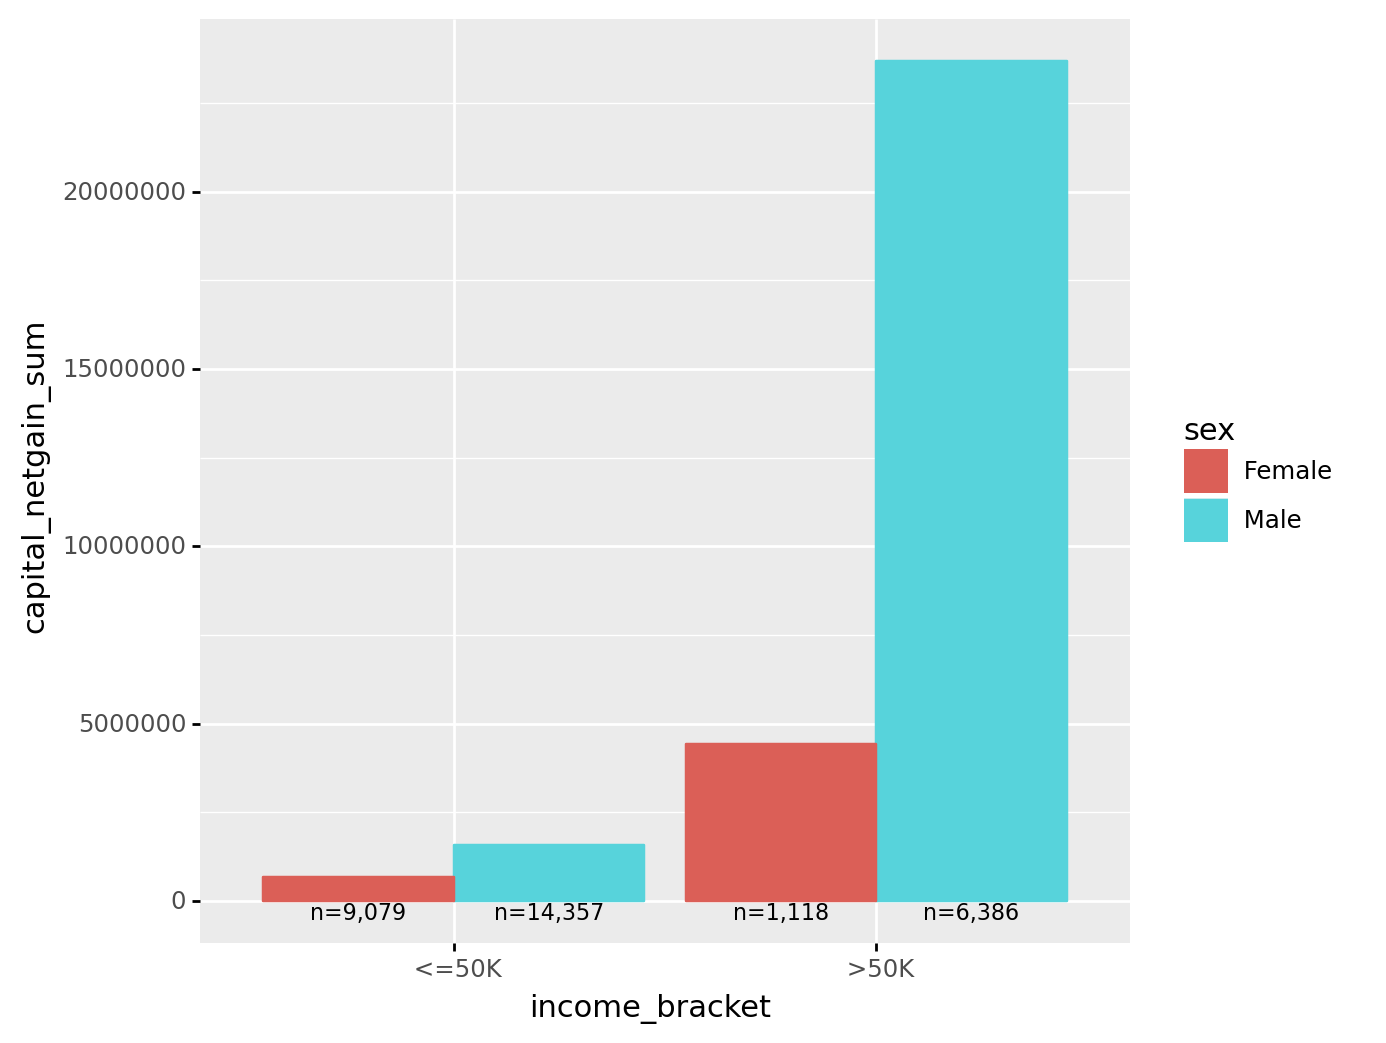

In [35]:
%agg_plot income_bracket,sex $metric -a sum -t sample_size

Error bar below shows that the male vs. female difference within high-income group is not significant

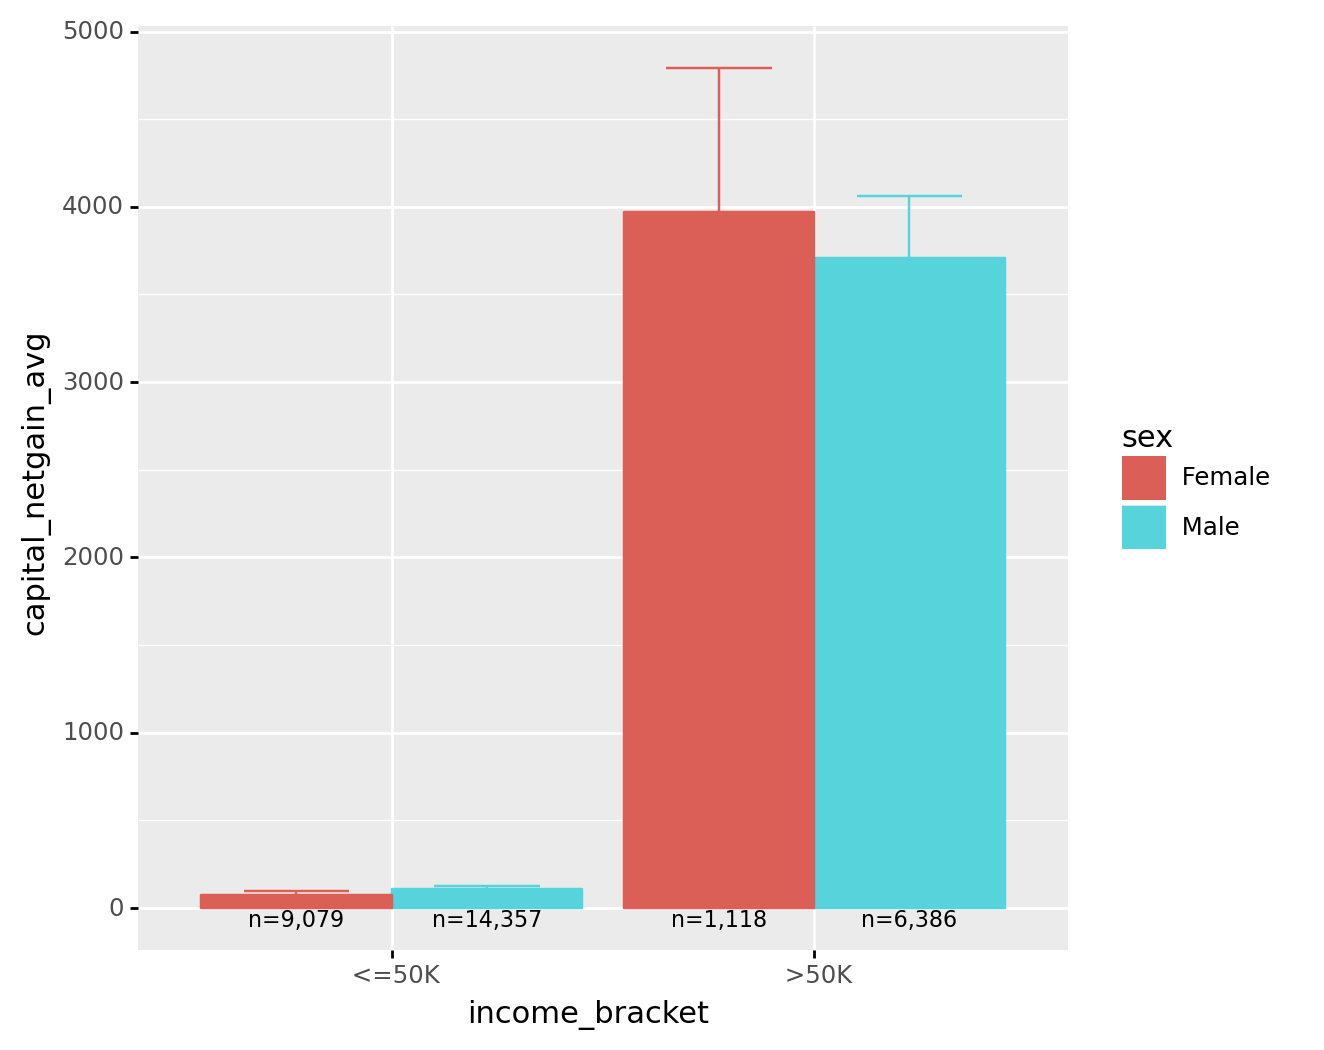

In [36]:
%agg_plot income_bracket,sex $metric -a avg

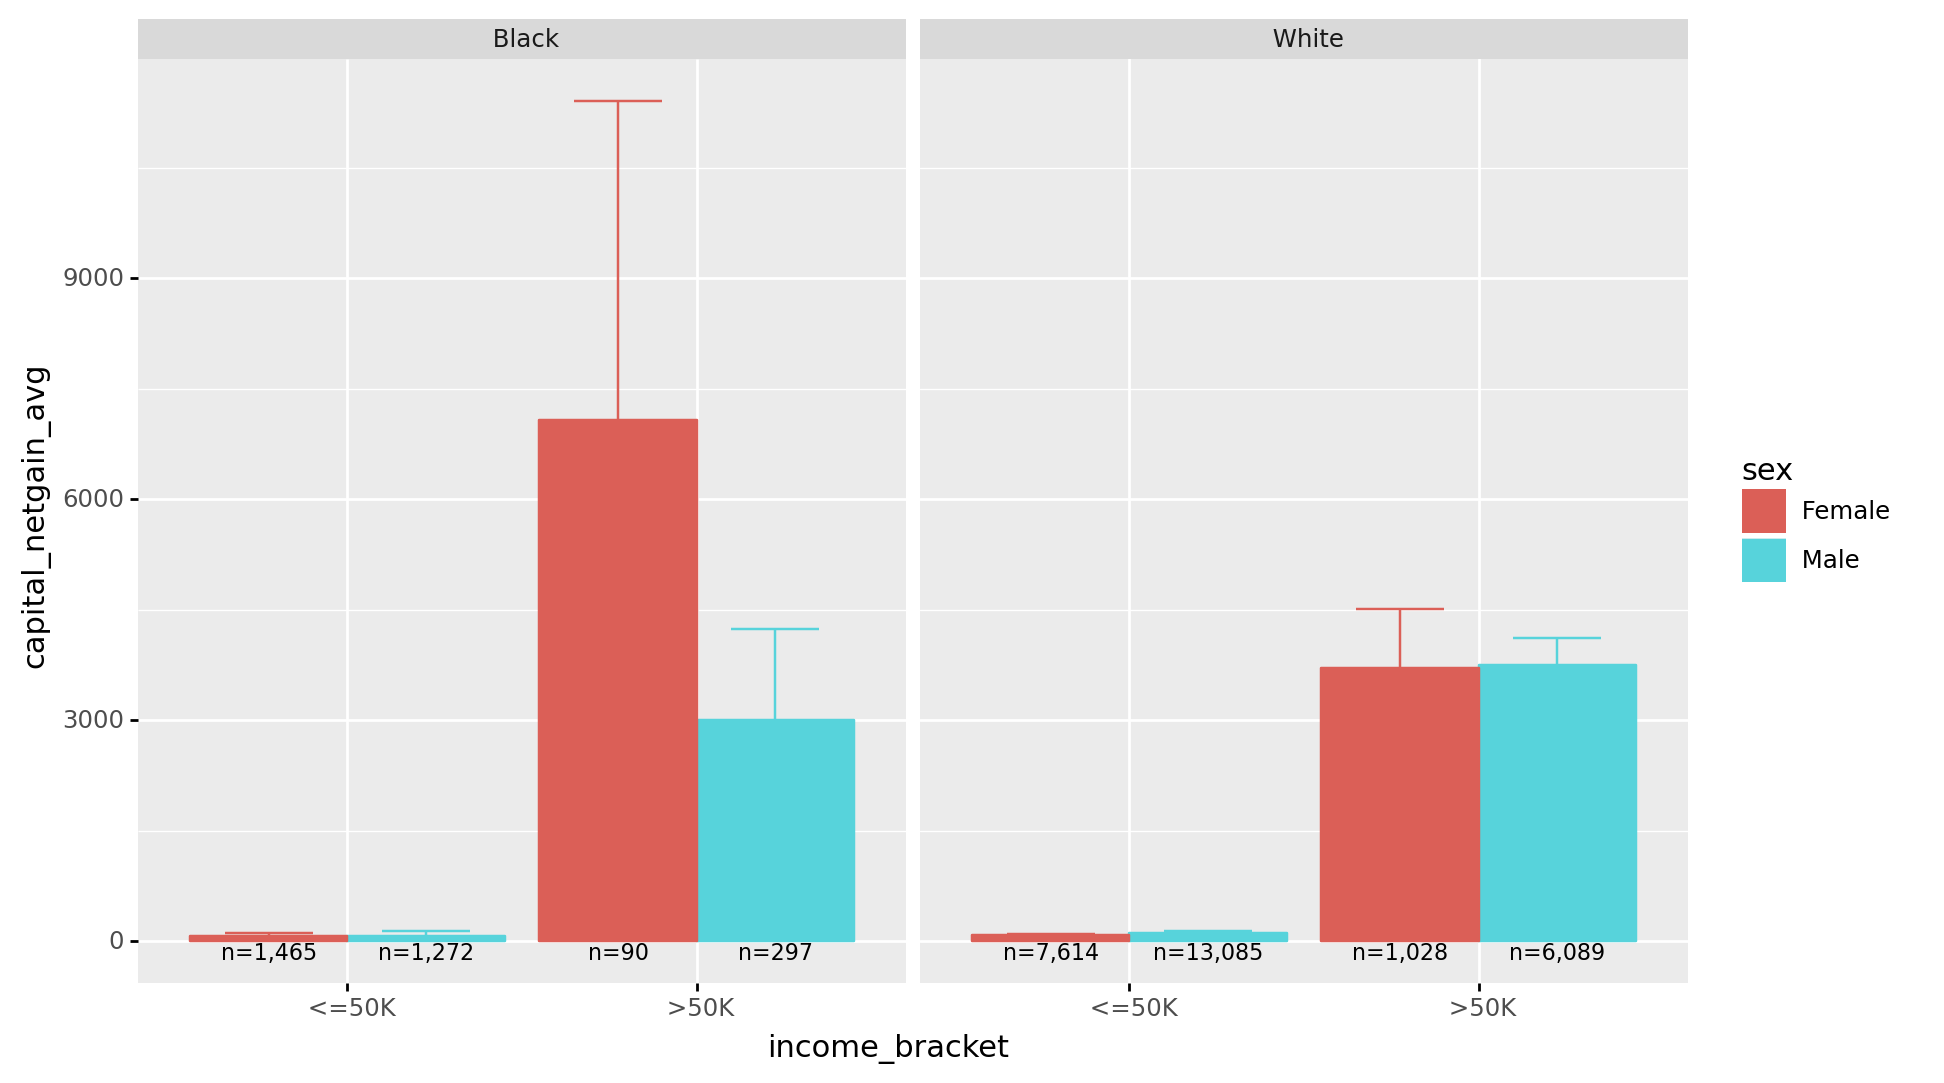

In [37]:
%agg_plot income_bracket,sex,race $metric -a avg -x 10

In [38]:
atbl['married_or_not'] = atbl.marital_status.apply(lambda e: 'married' if e == ' Married-civ-spouse' else 'non-married')

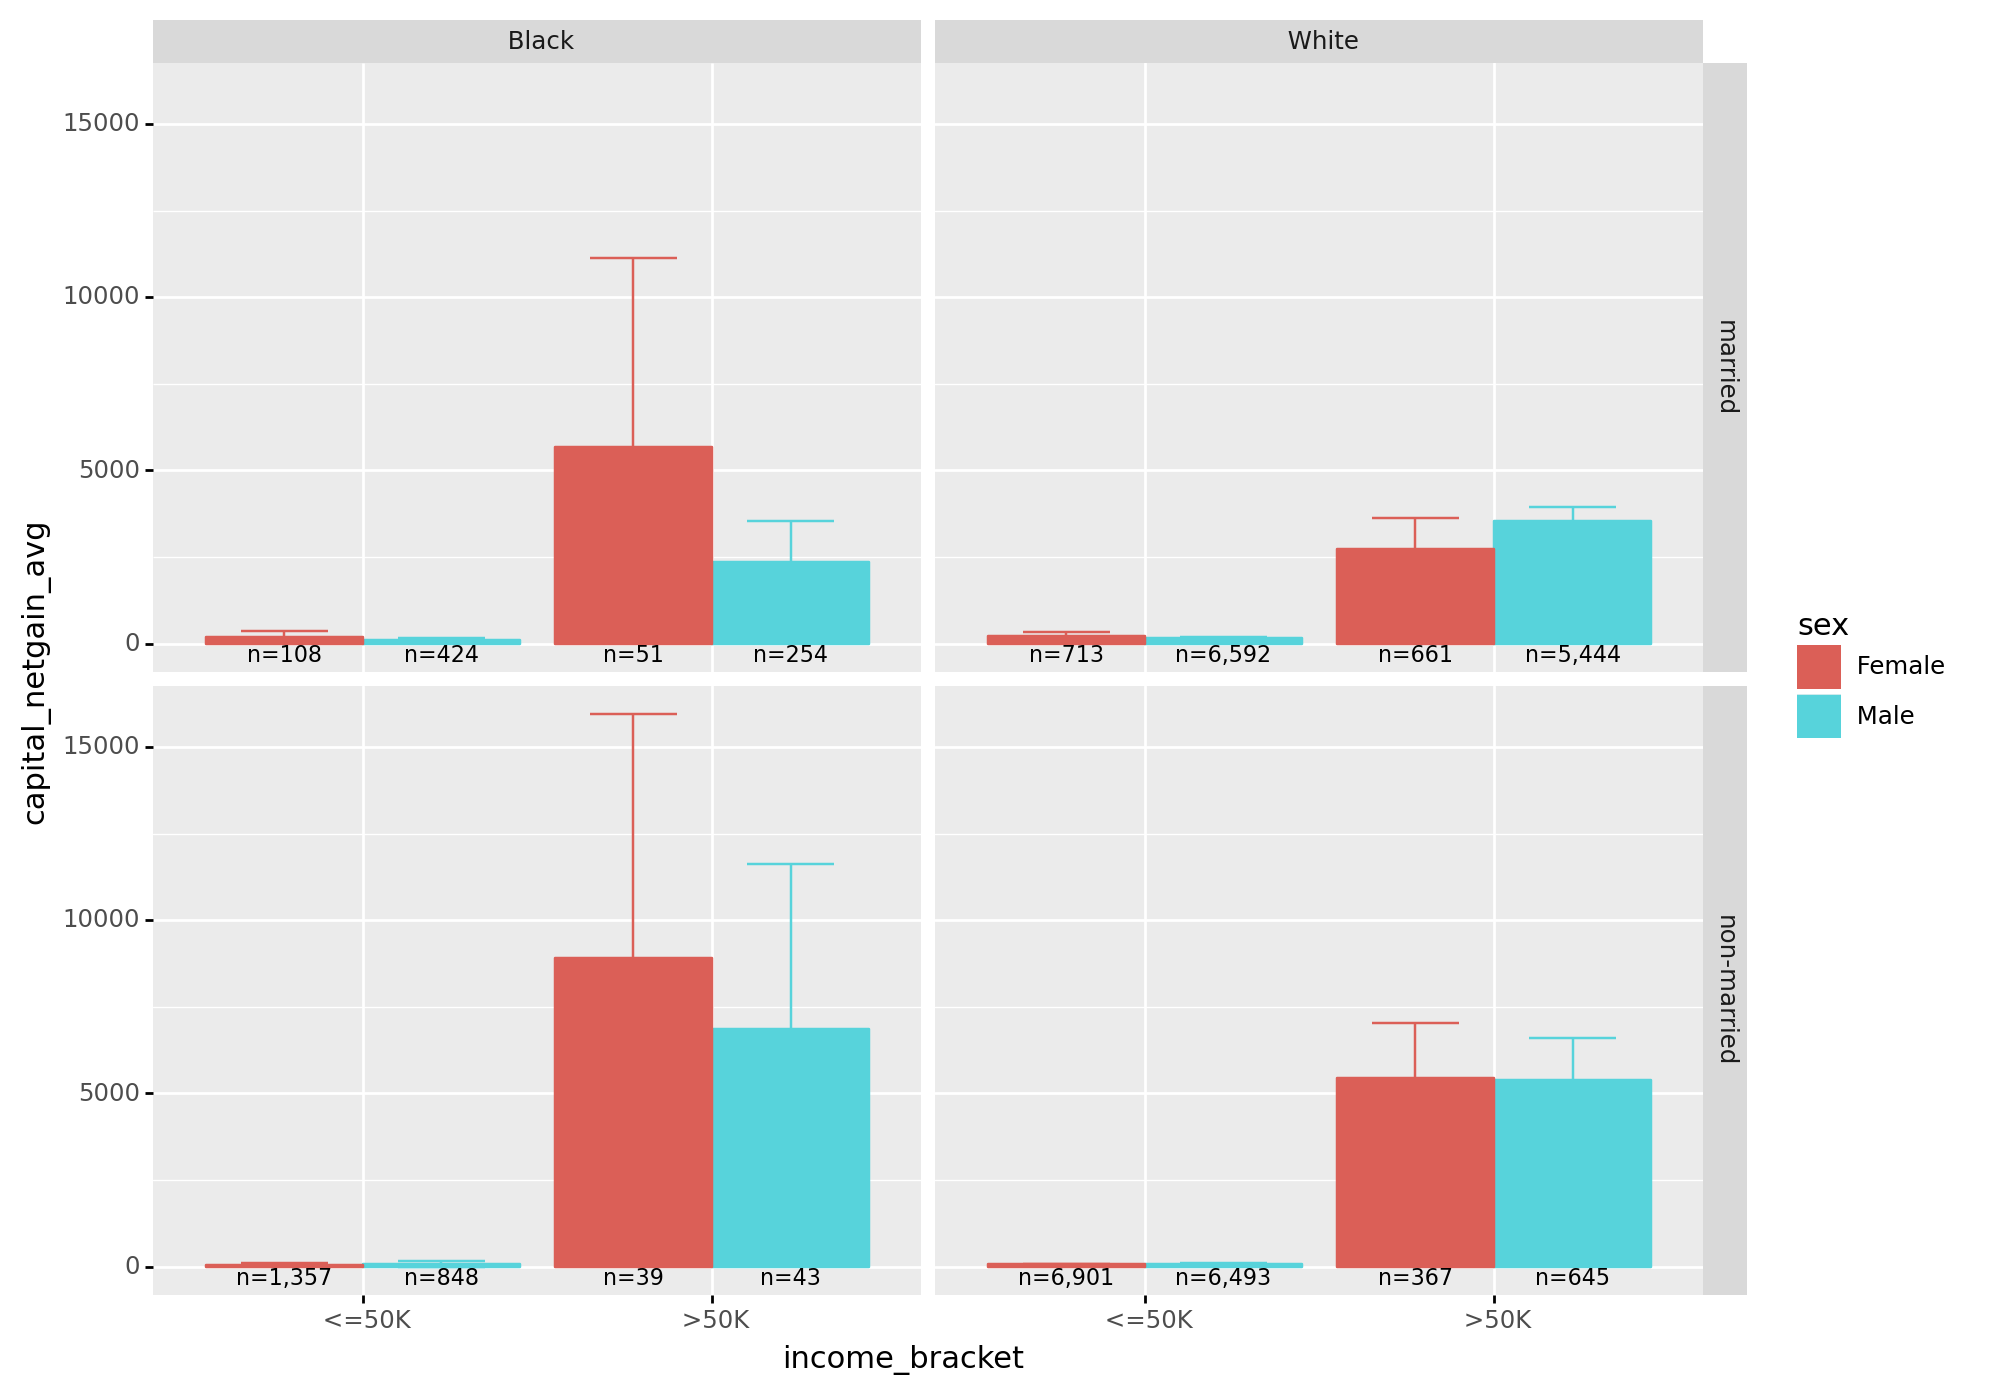

In [39]:
%agg_plot income_bracket,sex,race,married_or_not $metric -a avg -y 8 -x 10